Notebook used for Segmenting and Clustering Neighborhoods in Atlanta: Applied AI Capstone Project

I will be referencing a methodology found at this [website](https://alanhylands.com/how-to-web-scrape-wikipedia-python-urllib-beautiful-soup-pandas/) for scraping a webpage page with python. Firstly, we need to import the library we will use to connect to the following webpage:http://www.healthysf.org/bdi/outcomes/zipmap.htm. This is the page we want to collect data from.

In [1]:
# import the library we use to open URLs
import urllib.request

Now we specify the URL of the webpage we want to scrape San Francisco Neighborhood data from

In [2]:
# specify which URL/web page we are going to be scraping
url = "http://www.healthysf.org/bdi/outcomes/zipmap.htm"

Using the urllib.request library, we want to query the page and put the HTML data into a variable (which we have called ‘url’):

In [3]:
# open the url using urllib.request and put the HTML into the page variable
page = urllib.request.urlopen(url)

The next step requires us to import the BeautifulSoup library. We will use its functionality to parse and work with the HTML we receive from the webpage.

In [4]:
# install the beautiful soup package and then import the BeautifulSoup library so we can parse HTML and XML documents
! pip install bs4
from bs4 import BeautifulSoup

     |████████████████████████████████| 122kB 21.0MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4


Now we can utilize the Beautiful Soup Library to parse the HTML data from the wikipedia page and store it in a variable called 'san_fran'.

In [5]:
# parse the HTML from our URL into the BeautifulSoup parse tree format. install the parser lxml too.
#uncomment below if not installed
#!pip install lxml
#!pip install html5lib


san_fran = BeautifulSoup(page, "html.parser")



Let's take a look at what the underlying HTML in our webpage looks like by using Beautuiful Soup's prettify function.

In [6]:
print(san_fran.prettify())

<html>
 <head>
  <title>
   SF ZIP Map
  </title>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
 </head>
 <body bgcolor="#FFFFFF" leftmargin="0" marginheight="0" marginwidth="0" topmargin="0">
  <table border="0" cellpadding="4" cellspacing="0" width="100%">
   <tr>
    <td bgcolor="#666666" rowspan="2">
     <a href="../more/101grove.html">
      <img border="0" height="75" src="../images/101logo.jpg" width="100"/>
     </a>
    </td>
    <td bgcolor="#666666" width="100%">
     <font color="#CCCCCC" face="Arial, Helvetica, sans-serif" size="4">
      <strong>
       San 

      Francisco Burden of Disease &amp; Injury Study:
       <br/>
      </strong>
      <strong>
       Determinants of Health
      </strong>
     </font>
    </td>
   </tr>
   <tr>
    <td>
     <table border="0" cellpadding="2" cellspacing="1" width="100%">
      <tr>
       <td align="center" bgcolor="#CCCCCC" width="20%">
        <font color="#000000" face="Arial, Helvetica, sans-serif

We only want the table with the neighborhood and zip code data for San Francisco. The table starts with an HTML 'table' tag with a cellspacing of "6". Scrolling through the html code we see how the table is constructed and that the rows start and end with 'tr' and '/tr' tags. The top row of headers has 'th' tags while the data rows beneath for each club has 'td' tags. It’s in these 'td' tags that we will tell Python to extract our data from.

We know that the neighborhood data resides within an HTML table so firstly we send Beautiful Soup off to retrieve all instances of the 'table' tag within the page and add them to an array called all_tables.

In [7]:
# use the 'find_all' function to bring back all instances of the 'table' tag in the HTML and store in 'all_tables' variable

all_tables=san_fran.find_all('table')

all_tables

[<table border="0" cellpadding="4" cellspacing="0" width="100%">
 <tr>
 <td bgcolor="#666666" rowspan="2"> <a href="../more/101grove.html"><img border="0" height="75" src="../images/101logo.jpg" width="100"/></a></td>
 <td bgcolor="#666666" width="100%"><font color="#CCCCCC" face="Arial, Helvetica, sans-serif" size="4"><strong>San 
 
       Francisco Burden of Disease &amp; Injury Study:<br/>
 </strong><strong>Determinants of Health</strong></font></td>
 </tr>
 <tr>
 <td>
 <table border="0" cellpadding="2" cellspacing="1" width="100%">
 <tr>
 <td align="center" bgcolor="#CCCCCC" width="20%"><font color="#000000" face="Arial, Helvetica, sans-serif" size="2"><a href="../index.html">About 
 
             Site </a></font></td>
 <td align="center" bgcolor="#CCCCCC" width="20%"><font color="#000000" face="Arial, Helvetica, sans-serif" size="2"><a href="../determinants/index.html">Determinants</a></font></td>
 <td align="center" bgcolor="#CCCCCC" width="20%"><font color="#333333" face="Arial,

Looking through the output of ”all_tables” we can again see that the cell spacing of our chosen table is "6”. We can use this to get the Beautiful Soup library to only bring back the table data for this particular table and keep that in a variable called ”neighborhood_table“

In [8]:
neighborhood_table=san_fran.find('table', cellspacing="6")
neighborhood_table

<table align="center" border="0" cellpadding="2" cellspacing="6" width="100%">
<tr valign="top">
<td align="left" bgcolor="#FFFFFF" height="317" width="63%">
<blockquote>
<p align="left"><font color="#CC0000" face="Verdana, Arial, Helvetica, sans-serif"><strong><font size="4">San 

          Francisco Neighborhoods as ZIP Codes</font></strong></font></p>
<p><img height="430" src="images/zip-map.jpg" width="514"/></p>
<table border="1" cellpadding="2" cellspacing="1" width="100%">
<tr bgcolor="#666666">
<td bgcolor="#666666" width="24%"><b><font color="#FFFFFF" face="Verdana, Arial, Helvetica, sans-serif" size="2">Zip 

              Code</font></b></td>
<td bgcolor="#666666" width="45%"><b><font color="#FFFFFF" face="Verdana, Arial, Helvetica, sans-serif" size="2">Neighborhood</font></b></td>
<td bgcolor="#666666" width="31%"><b><font color="#FFFFFF" face="Verdana, Arial, Helvetica, sans-serif" size="2">Population 

              (Census 2000)</font></b></td>
</tr>
<tr>
<td width="24%"

Now we need to loop through the rows to get the data for every postal code in the table. The table is well structured with each postal code having it's own defined column. This makes things easier.

There are two columns in our table that we want to scrape the data from: Zip code and Neighorhood. We will create two empty lists (Aand B) to store our data in.

To begin, we want to use the Beautiful Soup ‘find_all’ function again and set it to look for the string ‘tr’. We will then set up a FOR loop for each row within that array and set Python to loop through the rows, one by one.

Within the loop we are going to use find_all again to search each row for the 'td' tags with the ‘td’ string. We will add all of these to a variable called ‘cells’ and then check to make sure that there are 2 items in our ‘cells’ array (i.e. one for each column).

If there are then we use the find(text=True)) option to extract the content string from within each 'td' element in that row and add them to the A-B lists we created at the start of this step. Let’s look at the code:

In [9]:
#Emtpy list for Zip Code
A=[]
#Empty list for Neighborhood
B=[]
for row in neighborhood_table.findAll('tr'):

    cells=row.findAll('td')

    if len(cells)==3:

        A.append(cells[0].find(text=True))

        B.append(cells[1].find(text=True))
#Now we need to remove the \n values at the end of each datapoint
A = [x.replace('\n', "") for x in A]
B = [x.replace('\n', "") for x in B]

We now need to import pandas and create a dataframe out of the lists we created. We'll assign each column of the dataframe with it's respective name

In [10]:
import pandas as pd

df=pd.DataFrame(A,columns=['Zip'])
df['Neighborhood']=B
df

,Zip,Neighborhood
0,Zip Code,Neighborhood
1,94102,Hayes Valley/Tenderloin/North of...
2,94103,South of Market
3,94107,Potrero Hill
4,94108,Chinatown
5,94109,Polk/Russian Hill (Nob Hill)
6,94110,Inner Mission/Bernal Heights
7,94112,Ingelside-Excelsior/Crocker-Amazon
8,94114,Castro/Noe Valley
9,94115,Western Addition/Japantown


We know need to clean the table by removing the first and last row, which do not represent valid neighborhood and zip code combinations.

In [11]:
n = 1
# Remove last n=1 rows from dataframe
df.drop(df.tail(n).index,inplace=True) # drop last row
# Remove first n=1 rows from dataframe
df.drop(df.head(n).index,inplace=True) # drop first row
df

,Zip,Neighborhood
1,94102,Hayes Valley/Tenderloin/North of...
2,94103,South of Market
3,94107,Potrero Hill
4,94108,Chinatown
5,94109,Polk/Russian Hill (Nob Hill)
6,94110,Inner Mission/Bernal Heights
7,94112,Ingelside-Excelsior/Crocker-Amazon
8,94114,Castro/Noe Valley
9,94115,Western Addition/Japantown
10,94116,Parkside/Forest Hill


Awesome! We know have our cleaned up dataframe that we will utilize in the next step. Now we will use the .shape method to print the number of rows in the dataframe.

In [12]:
df.shape

(21, 2)

We have 21 rows and two columns in our dataframe.

 <font size="8"> Part 2</font>

We need to now associate latitude and longitude values with our neighborhoods/zip codes. We accessed zip code data as an Excel file from [Opendatasoft.](https://public.opendatasoft.com/explore/dataset/us-zip-code-latitude-and-longitude/export/?refine.state=CA). Utilizing the Excel file we downloaded from the website, we can import the latitude and longitude values from the Excel file as a pandas dataframe called location_data. If you have any issues reading the excel file, open Excel and save the excel file as an .xls file so that it is read correctly as an excel file.

In [13]:
location_data = pd.read_excel('California_Zip_Codes.xls')
location_data

,Zip,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,91319,Newbury Park,CA,34.032383,-119.134300,-8,1,"34.032383, -119.1343"
1,92503,Riverside,CA,33.913550,-117.460520,-8,1,"33.91355, -117.46052"
2,94211,Sacramento,CA,38.377411,-121.444429,-8,1,"38.377411, -121.444429"
3,91902,Bonita,CA,32.663803,-117.024560,-8,1,"32.663803, -117.02456"
4,95901,Marysville,CA,39.159730,-121.537350,-8,1,"39.15973, -121.53735"
...,...,...,...,...,...,...,...,...
2711,90638,La Mirada,CA,33.902130,-118.009660,-8,1,"33.90213, -118.00966"
2712,90608,Whittier,CA,33.786594,-118.298662,-8,1,"33.786594, -118.298662"
2713,93238,Kernville,CA,35.784367,-118.437690,-8,1,"35.784367, -118.43769"
2714,93675,Squaw Valley,CA,36.713181,-119.183270,-8,1,"36.713181, -119.18327"


Now we need to merge our dataframe with our San Francisco neighborhood data (neigh_df) with our latitude and longitude dataframe, using the Postal Code as a common reference.

In [14]:
#Force the Zip code values in the San Francisco dataframe to integer so that they are the same type as the Zip codes in location_data
df["Zip"] = df["Zip"].astype(int)
#Merge the two dataframes using the common column 'Zip'
loc_neigh_df = pd.merge(df, location_data, on ="Zip")
loc_neigh_df

,Zip,Neighborhood,City,State,Latitude,Longitude,Timezone,Daylight savings time flag,geopoint
0,94102,Hayes Valley/Tenderloin/North of...,San Francisco,CA,37.779329,-122.41915,-8,1,"37.779329, -122.41915"
1,94103,South of Market,San Francisco,CA,37.772329,-122.41087,-8,1,"37.772329, -122.41087"
2,94107,Potrero Hill,San Francisco,CA,37.766529,-122.39577,-8,1,"37.766529, -122.39577"
3,94108,Chinatown,San Francisco,CA,37.792678,-122.40793,-8,1,"37.792678, -122.40793"
4,94109,Polk/Russian Hill (Nob Hill),San Francisco,CA,37.792778,-122.42188,-8,1,"37.792778, -122.42188"
5,94110,Inner Mission/Bernal Heights,San Francisco,CA,37.748730,-122.41545,-8,1,"37.74873, -122.41545"
6,94112,Ingelside-Excelsior/Crocker-Amazon,San Francisco,CA,37.720931,-122.44241,-8,1,"37.720931, -122.44241"
7,94114,Castro/Noe Valley,San Francisco,CA,37.758434,-122.43512,-8,1,"37.758434, -122.43512"
8,94115,Western Addition/Japantown,San Francisco,CA,37.786129,-122.43736,-8,1,"37.786129, -122.43736"
9,94116,Parkside/Forest Hill,San Francisco,CA,37.743381,-122.48578,-8,1,"37.743381, -122.48578"


Now we need to remove columns that we do not need going forward: "City", "State", "Timezone", "Daylight savings time flag" and "geopoint".

In [15]:
#Delete columns that we don't need
loc_neigh_df = loc_neigh_df.drop(loc_neigh_df.columns[[2,3,6,7,8]],axis =1)
loc_neigh_df

,Zip,Neighborhood,Latitude,Longitude
0,94102,Hayes Valley/Tenderloin/North of...,37.779329,-122.41915
1,94103,South of Market,37.772329,-122.41087
2,94107,Potrero Hill,37.766529,-122.39577
3,94108,Chinatown,37.792678,-122.40793
4,94109,Polk/Russian Hill (Nob Hill),37.792778,-122.42188
5,94110,Inner Mission/Bernal Heights,37.748730,-122.41545
6,94112,Ingelside-Excelsior/Crocker-Amazon,37.720931,-122.44241
7,94114,Castro/Noe Valley,37.758434,-122.43512
8,94115,Western Addition/Japantown,37.786129,-122.43736
9,94116,Parkside/Forest Hill,37.743381,-122.48578


Finally, let's import and clean the COVID-19 data to then append to our dataframe (by zip code matching). We got the COVID-19 data for San Francisco from this [website](https://data.sfgov.org/COVID-19/COVID-19-Cases-by-Geography-and-Date/d2ef-idww). We then exported the data as the csv file shown below (10/27/2020).

In [16]:
covid_df = pd.read_csv('COVID-19_Cases_by_Geography_and_Date.csv')

Let's take a look at the COVID-19 Data

In [17]:
covid_df.head(30)

,Specimen Collection Date,area_type,id,acs_population,New Confirmed Cases,Cumulative Confirmed Cases,Rate of Cumulative Confirmed Case,multipolygon,last_updated_at
0,2020/03/03,Citywide,Citywide,"870,044",2,2,NaN,NaN,10/25/2020 06:02:23 PM
1,2020/03/04,Citywide,Citywide,"870,044",0,2,NaN,NaN,10/25/2020 06:02:23 PM
2,2020/03/05,Citywide,Citywide,"870,044",6,8,NaN,NaN,10/25/2020 06:02:23 PM
3,2020/03/06,Citywide,Citywide,"870,044",0,8,NaN,NaN,10/25/2020 06:02:23 PM
4,2020/03/07,Citywide,Citywide,"870,044",5,13,NaN,NaN,10/25/2020 06:02:23 PM
5,2020/03/08,Citywide,Citywide,"870,044",1,14,NaN,NaN,10/25/2020 06:02:23 PM
6,2020/03/09,Citywide,Citywide,"870,044",0,14,NaN,NaN,10/25/2020 06:02:23 PM
7,2020/03/10,Citywide,Citywide,"870,044",6,20,NaN,NaN,10/25/2020 06:02:23 PM
8,2020/03/11,Citywide,Citywide,"870,044",9,29,0.333316,NaN,10/25/2020 06:02:23 PM
9,2020/03/12,Citywide,Citywide,"870,044",6,35,0.402279,NaN,10/25/2020 06:02:23 PM


We don't need citywide data, we only want data related to our zip codes. Let's separate the dataframe for just our zip code related data (all zip codes contain '94').

In [18]:
zip_covid = covid_df.loc[covid_df['id'].str.contains("94")]
zip_covid.head(20)

,Specimen Collection Date,area_type,id,acs_population,New Confirmed Cases,Cumulative Confirmed Cases,Rate of Cumulative Confirmed Case,multipolygon,last_updated_at
4680,2020/03/16,ZCTA,94110,"74,161",3,12,NaN,MULTIPOLYGON (((-122.40508999999997 37.7646279...,10/25/2020 06:02:23 PM
4681,2020/03/17,ZCTA,94110,"74,161",2,14,NaN,MULTIPOLYGON (((-122.40508999999997 37.7646279...,10/25/2020 06:02:23 PM
4682,2020/03/18,ZCTA,94110,"74,161",4,18,NaN,MULTIPOLYGON (((-122.40508999999997 37.7646279...,10/25/2020 06:02:23 PM
4683,2020/03/19,ZCTA,94110,"74,161",1,19,NaN,MULTIPOLYGON (((-122.40508999999997 37.7646279...,10/25/2020 06:02:23 PM
4684,2020/03/20,ZCTA,94110,"74,161",3,22,2.966519,MULTIPOLYGON (((-122.40508999999997 37.7646279...,10/25/2020 06:02:23 PM
4685,2020/03/21,ZCTA,94110,"74,161",2,24,3.236202,MULTIPOLYGON (((-122.40508999999997 37.7646279...,10/25/2020 06:02:23 PM
4686,2020/03/22,ZCTA,94110,"74,161",1,25,3.371044,MULTIPOLYGON (((-122.40508999999997 37.7646279...,10/25/2020 06:02:23 PM
4687,2020/03/23,ZCTA,94110,"74,161",1,26,3.505886,MULTIPOLYGON (((-122.40508999999997 37.7646279...,10/25/2020 06:02:23 PM
4688,2020/03/24,ZCTA,94110,"74,161",4,30,4.045253,MULTIPOLYGON (((-122.40508999999997 37.7646279...,10/25/2020 06:02:23 PM
4689,2020/03/25,ZCTA,94110,"74,161",6,36,4.854303,MULTIPOLYGON (((-122.40508999999997 37.7646279...,10/25/2020 06:02:23 PM


Now let's group by id (zip code) to get a history of COVID cases from 2020/03/16 to 2020/10/25

In [19]:
zip_covid2 = zip_covid.groupby(['id']).mean()
zip_covid2
#Rate of Cumulative Confirmed Case we don't need, just the count.
zip_covid2 = zip_covid2.drop(['Rate of Cumulative Confirmed Case'],axis =1)
zip_covid_fin = zip_covid2.rename(columns = {'New Confirmed Cases':'Average New COVID-19 Cases per Day'})
# setting id as index column
zip_covid_fin.reset_index(level = 0, inplace = True)
#Rename id as 'Zip'
zip_covid_fin2 = zip_covid_fin.rename(columns = {'id':'Zip'})
zip_covid_fin2

,Zip,Average New COVID-19 Cases per Day
0,94102,3.769953
1,94103,2.890909
2,94105,0.453659
3,94107,1.825472
4,94108,0.447236
5,94109,3.140271
6,94110,7.716216
7,94111,0.077670
8,94112,8.301802
9,94114,0.972477


Now we need to merge our dataframe with our San Francisco neighborhood data (neigh_df) with our latitude and longitude dataframe, using the Postal Code as a common reference.

In [20]:
#Force the Zip code values in the San Francisco COVID dataframe to integer so that they are the same type as the Zip codes in location_data
zip_covid_fin2["Zip"] = zip_covid_fin2["Zip"].astype(int)
#Merge the two dataframes using the common column 'Zip'
loc_neigh_df = pd.merge(loc_neigh_df, zip_covid_fin2, on ="Zip")
loc_neigh_df

,Zip,Neighborhood,Latitude,Longitude,Average New COVID-19 Cases per Day
0,94102,Hayes Valley/Tenderloin/North of...,37.779329,-122.41915,3.769953
1,94103,South of Market,37.772329,-122.41087,2.890909
2,94107,Potrero Hill,37.766529,-122.39577,1.825472
3,94108,Chinatown,37.792678,-122.40793,0.447236
4,94109,Polk/Russian Hill (Nob Hill),37.792778,-122.42188,3.140271
5,94110,Inner Mission/Bernal Heights,37.748730,-122.41545,7.716216
6,94112,Ingelside-Excelsior/Crocker-Amazon,37.720931,-122.44241,8.301802
7,94114,Castro/Noe Valley,37.758434,-122.43512,0.972477
8,94115,Western Addition/Japantown,37.786129,-122.43736,2.144796
9,94116,Parkside/Forest Hill,37.743381,-122.48578,0.854460


 <font size="8"> Part 3</font>

Now its time to explore and cluster the neighborhoods in San Francisco.

Let's download all the dependencies that we will need.

In [21]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0



geopy-2.0.0          | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: d

Now we can use the geopy library to get the latitude and longitude values of San Francisco

In [22]:
address = 'San Francisco, CA, USA'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of San Francisco are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of San Francisco are 37.7790262, -122.4199061.


Now we can create a map of San Francisco with neighborhoods superimposed on top.

In [23]:
# create map of San Francisco using latitude and longitude values
map_sanfran = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, neighborhood, count  in zip(loc_neigh_df['Latitude'], loc_neigh_df['Longitude'], loc_neigh_df['Neighborhood'],loc_neigh_df['Average New COVID-19 Cases per Day']):
    label = '{}. Avg. New COVID-19 Cases Per Day is {}'.format(neighborhood, round(count,2))
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_sanfran)  
    
map_sanfran

# add pop-up text to each marker on the map
latitudes = list(loc_neigh_df['Latitude'])
longitudes = list(loc_neigh_df['Longitude'])
labels = list(loc_neigh_df['Neighborhood'])

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(map_sanfran)    

map_sanfran

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them. First Define Foursquare Credentials and Version.

In [24]:
CLIENT_ID = 'RIP10020R4E4QE3D5RUUSR1A44UWY1HBKU3MAZSTIFIL1IGK' # your Foursquare ID
CLIENT_SECRET = 'SVGLEREF4UKHWH4PMLASHOHGHV5XC4R2QEZIDVRFKY35I2HE' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RIP10020R4E4QE3D5RUUSR1A44UWY1HBKU3MAZSTIFIL1IGK
CLIENT_SECRET:SVGLEREF4UKHWH4PMLASHOHGHV5XC4R2QEZIDVRFKY35I2HE


From the Foursquare lab in the previous module, we know that all the information is in the _items_ key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

Let's create a function that returns the nearest venues for all the Neighboorhoods in San Francisco.

In [25]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called sanfran_venues.

In [26]:
sanfran_data = loc_neigh_df
sanfran_venues = getNearbyVenues(names=sanfran_data['Neighborhood'],
                                   latitudes=sanfran_data['Latitude'],
                                   longitudes=sanfran_data['Longitude'])

Hayes               Valley/Tenderloin/North of Market
South               of Market
Potrero               Hill
Chinatown               
Polk/Russian               Hill (Nob Hill)
Inner               Mission/Bernal Heights
Ingelside-Excelsior/Crocker-Amazon
Castro/Noe               Valley 
Western               Addition/Japantown
Parkside/Forest               Hill 
Haight-Ashbury
Inner               Richmond 
Outer               Richmond 
Sunset
Marina
Bayview-Hunters               Point 
St.               Francis Wood/Miraloma/West Portal
Twin               Peaks-Glen Park
Lake               Merced 
North               Beach/Chinatown
Visitacion               Valley/Sunnydale


#### Let's check the size of the resulting dataframe

In [27]:
print(sanfran_venues.shape)
sanfran_venues.head()

(1092, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Hayes Valley/Tenderloin/North of...,37.779329,-122.41915,Louise M. Davies Symphony Hall,37.777976,-122.420157,Concert Hall
1,Hayes Valley/Tenderloin/North of...,37.779329,-122.41915,Herbst Theater,37.779548,-122.420953,Concert Hall
2,Hayes Valley/Tenderloin/North of...,37.779329,-122.41915,War Memorial Opera House,37.778601,-122.420816,Opera House
3,Hayes Valley/Tenderloin/North of...,37.779329,-122.41915,San Francisco Ballet,37.778580,-122.420798,Dance Studio
4,Hayes Valley/Tenderloin/North of...,37.779329,-122.41915,Asian Art Museum,37.780178,-122.416505,Art Museum


Let's check how many venues were returned for each neighborhood


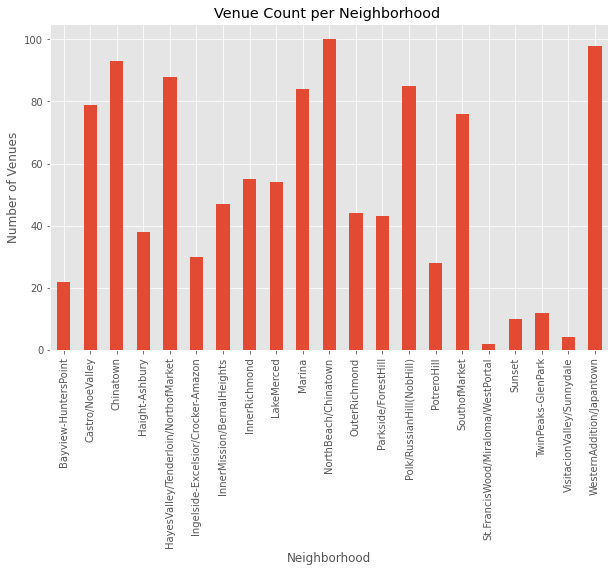

In [28]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
mpl.style.use('ggplot') # optional: for ggplot-like style
sanfran_venues_graph = sanfran_venues.copy()
sanfran_venues_graph['Neighborhood'] = sanfran_venues_graph['Neighborhood'].str.replace(" ","")
san_counts = sanfran_venues_graph.groupby('Neighborhood').count()
#san_counts = san_counts['Neighborhood'].str.strip()
san_counts2 = san_counts.iloc[:,1]
# step 2: plot data
san_counts2.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Number of Venues') # add y-label to the plot
plt.title('Venue Count per Neighborhood ') # add title to the plot

plt.show()

Now we need to analyze each neighborhood

In [29]:
# one hot encoding for venues
sanfran_onehot = pd.get_dummies(sanfran_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
sanfran_onehot['Neighborhood'] = sanfran_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [sanfran_onehot.columns[-1]] + list(sanfran_onehot.columns[:-1])
sanfran_onehot = sanfran_onehot[fixed_columns]

sanfran_onehot.head()

,Neighborhood,ATM,Accessories Store,Adult Boutique,African Restaurant,Alternative Healer,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Beer Bar,Beer Garden,Bike Shop,Bookstore,Boutique,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Café,Camera Store,Candy Store,Cantonese Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Credit Union,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distillery,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Electronics Store,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Space,Eye Doctor,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hill,Historic Site,History Museum,Hobby Shop,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Jiangsu Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Laundromat,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Park,Parking,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Public Art,Ramen Restaurant,Record Shop,Restaurant,Road,Rock Club,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Sicilian Restaurant,Smoke Shop,Smoothie Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Trail,Train Station,Trattoria/Osteria,Turkish Restaurant,Tuscan Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Hayes Valley/Tenderloin/North of...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Hayes Valley/Tenderloin/North of...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0

And let's examine the new dataframe size.

In [30]:
sanfran_onehot.shape

(1092, 235)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [31]:
sanfran_grouped = sanfran_onehot.groupby('Neighborhood').mean().reset_index()
sanfran_grouped

,Neighborhood,ATM,Accessories Store,Adult Boutique,African Restaurant,Alternative Healer,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Beer Bar,Beer Garden,Bike Shop,Bookstore,Boutique,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Café,Camera Store,Candy Store,Cantonese Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Credit Union,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distillery,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Electronics Store,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Space,Eye Doctor,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hill,Historic Site,History Museum,Hobby Shop,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Jiangsu Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Laundromat,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Park,Parking,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Public Art,Ramen Restaurant,Record Shop,Restaurant,Road,Rock Club,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Sicilian Restaurant,Smoke Shop,Smoothie Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Trail,Train Station,Trattoria/Osteria,Turkish Restaurant,Tuscan Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Bayview-Hunters Point,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.090909,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.045455,0.000000,0.000000,0.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

#### Let's confirm the new size


In [32]:
sanfran_grouped.shape

(21, 235)

#### Let's print each neighborhood along with the top 5 most common venues


In [33]:
num_top_venues = 5

for hood in sanfran_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = sanfran_grouped[sanfran_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bayview-Hunters               Point ----
                             venue  freq
0  Southern / Soul Food Restaurant  0.18
1               Mexican Restaurant  0.14
2                           Bakery  0.09
3                             Café  0.09
4               Light Rail Station  0.05


----Castro/Noe               Valley ----
               venue  freq
0            Gay Bar  0.10
1    Thai Restaurant  0.05
2        Coffee Shop  0.05
3     Scenic Lookout  0.04
4  Indian Restaurant  0.03


----Chinatown               ----
                venue  freq
0               Hotel  0.06
1         Coffee Shop  0.05
2              Bakery  0.05
3  Chinese Restaurant  0.04
4         Men's Store  0.03


----Haight-Ashbury----
                    venue  freq
0             Coffee Shop  0.11
1             Pizza Place  0.05
2                    Park  0.05
3  Thrift / Vintage Store  0.05
4                Boutique  0.05


----Hayes               Valley/Tenderloin/North of Market----
               venue

#### Let's put that into a _pandas_ dataframe
First, let's write a function to sort the venues in descending order.


In [34]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.


In [35]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = sanfran_grouped['Neighborhood']

for ind in np.arange(sanfran_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sanfran_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head(21)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bayview-Hunters Point,Southern / Soul Food Restaurant,Mexican Restaurant,Café,Bakery,African Restaurant,Gym,Bus Station,Liquor Store,Light Rail Station,Coffee Shop
1,Castro/Noe Valley,Gay Bar,Coffee Shop,Thai Restaurant,Scenic Lookout,Yoga Studio,Indian Restaurant,Plaza,Playground,Café,Clothing Store
2,Chinatown,Hotel,Bakery,Coffee Shop,Chinese Restaurant,Cocktail Bar,Men's Store,Italian Restaurant,Sushi Restaurant,Szechuan Restaurant,Dim Sum Restaurant
3,Haight-Ashbury,Coffee Shop,Pizza Place,Thrift / Vintage Store,Park,Boutique,Playground,Breakfast Spot,Mexican Restaurant,Gastropub,Supermarket
4,Hayes Valley/Tenderloin/North of...,Coffee Shop,Café,Hotel,Wine Bar,Vegetarian / Vegan Restaurant,French Restaurant,Sandwich Place,Restaurant,Cocktail Bar,Poke Place
5,Ingelside-Excelsior/Crocker-Amazon,Bus Station,Pizza Place,Sandwich Place,Vietnamese Restaurant,Mexican Restaurant,Asian Restaurant,Liquor Store,Fast Food Restaurant,Filipino Restaurant,Fried Chicken Joint
6,Inner Mission/Bernal Heights,Mexican Restaurant,Coffee Shop,Pizza Place,Park,Dive Bar,Gym / Fitness Center,Grocery Store,Burrito Place,South American Restaurant,Optical Shop
7,Inner Richmond,Chinese Restaurant,Bakery,Burmese Restaurant,Japanese Restaurant,Thai Restaurant,Pizza Place,Vietnamese Restaurant,Wine Shop,Art Gallery,Dessert Shop
8,Lake Merced,Sandwich Place,Juice Bar,Cosmetics Shop,Café,Mexican Restaurant,Lingerie Store,Bakery,Candy Store,Clothing Store,Pizza Place
9,Marina,Italian Restaurant,Gym / Fitness Center,French Restaurant,Sandwich Place,Wine Bar,Park,Burger Joint,Sushi Restaurant,Taco Place,Diner


Before we cluster the neighorhoods together, we need to add the average new covid cases per day for each neighborhood dat to the dataframe.

First step requires us to normalize the average new COVID-19 cases per day data.

In [36]:
from sklearn import preprocessing
x = loc_neigh_df['Average New COVID-19 Cases per Day'] #returns a numpy array
max_value = x.max()
min_value = x.min()
loc_neigh_df['Average New COVID-19 Cases per Day'] = (x - min_value) / (max_value - min_value)
norm_df = loc_neigh_df[['Neighborhood', 'Average New COVID-19 Cases per Day']]
print(norm_df)

                                         Neighborhood  \
0   Hayes               Valley/Tenderloin/North of...   
1                       South               of Market   
2                          Potrero               Hill   
3                            Chinatown                  
4          Polk/Russian               Hill (Nob Hill)   
5          Inner               Mission/Bernal Heights   
6                  Ingelside-Excelsior/Crocker-Amazon   
7                    Castro/Noe               Valley    
8            Western               Addition/Japantown   
9                 Parkside/Forest               Hill    
10                                     Haight-Ashbury   
11                      Inner               Richmond    
12                      Outer               Richmond    
13                                             Sunset   
14                                             Marina   
15               Bayview-Hunters               Point    
16  St.               Francis W

Now we append the normalized Average New COVID-19 Per Day to the sanfran_grouped dataframe for clustering

In [37]:
#Merge the two dataframes using the common column 'Zip'
sanfran_grouped = pd.merge(norm_df, sanfran_grouped, on ="Neighborhood")
sanfran_grouped

,Neighborhood,Average New COVID-19 Cases per Day,ATM,Accessories Store,Adult Boutique,African Restaurant,Alternative Healer,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,BBQ Joint,Bagel Shop,Bakery,Bar,Baseball Field,Beer Bar,Beer Garden,Bike Shop,Bookstore,Boutique,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Burrito Place,Bus Line,Bus Station,Bus Stop,Business Service,Café,Camera Store,Candy Store,Cantonese Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Cafeteria,Comedy Club,Concert Hall,Convenience Store,Cosmetics Shop,Credit Union,Creperie,Cultural Center,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Distillery,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Electronics Store,Empanada Restaurant,Entertainment Service,Ethiopian Restaurant,Event Space,Eye Doctor,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hill,Historic Site,History Museum,Hobby Shop,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Jiangsu Restaurant,Juice Bar,Karaoke Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Laundromat,Library,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts School,Massage Studio,Mattress Store,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Park,Parking,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Public Art,Ramen Restaurant,Record Shop,Restaurant,Road,Rock Club,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Sicilian Restaurant,Smoke Shop,Smoothie Shop,Snack Place,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Supermarket,Supplement Shop,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Tiki Bar,Toy / Game Store,Trail,Train Station,Trattoria/Osteria,Turkish Restaurant,Tuscan Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,Hayes Valley/Tenderloin/North of...,0.423030,0.000000,0.000000,0.000000,0.000000,0.000000,0.011364,0.000000,0.00,0.000000,0.011364,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.022727,0.011364,0.00,0.022727,0.000000,0.000000,0.011364,0.022727,0.000000,0.000000,0.011364,0.011364,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.011364,0.000000,0.000000,0.022727,0.056818,0.000000,0.000000,0.022727,0.000000,0.000000,0.011364,0.000000,0.000000,0.000000,0.000000,0.011364,0.000000,0.000000,0.000000,0.000000,0.011364,0.000000,0.000000,0.000000,0.0113

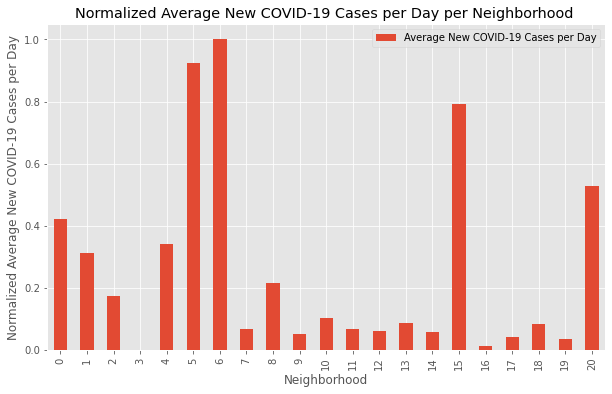

In [38]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
mpl.style.use('ggplot') # optional: for ggplot-like style
sanfran_grouped_graph = sanfran_grouped.copy()
sanfran_grouped_graph['Neighborhood'] = sanfran_grouped_graph['Neighborhood'].str.replace(" ","")
san_counts4 = sanfran_grouped_graph[['Neighborhood','Average New COVID-19 Cases per Day']]
# step 2: plot data
san_counts4.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Neighborhood') # add to x-label to the plot
plt.ylabel('Normalized Average New COVID-19 Cases per Day') # add y-label to the plot
plt.title('Normalized Average New COVID-19 Cases per Day per Neighborhood ') # add title to the plot

plt.show()

Finally, we conclude part 3 by clustering the neighbhoods and mapping them using folium.

Run _k_-means to cluster the neighborhood into 5 clusters.

In [39]:
# set number of clusters
kclusters = 5

sanfran_grouped_clustering = sanfran_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(sanfran_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20] 

array([0, 0, 0, 4, 0, 1, 1, 4, 0, 4, 4, 4, 4, 4, 4, 1, 2, 4, 4, 4],
      dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.


In [40]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

sanfran_merged = sanfran_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
sanfran_merged = sanfran_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

sanfran_merged.head() # check the last columns!

,Zip,Neighborhood,Latitude,Longitude,Average New COVID-19 Cases per Day,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,94102,Hayes Valley/Tenderloin/North of...,37.779329,-122.41915,0.423030,0,Coffee Shop,Café,Hotel,Wine Bar,Vegetarian / Vegan Restaurant,French Restaurant,Sandwich Place,Restaurant,Cocktail Bar,Poke Place
1,94103,South of Market,37.772329,-122.41087,0.311115,1,Nightclub,Cocktail Bar,Gay Bar,Food Truck,Motorcycle Shop,Bar,Thai Restaurant,Furniture / Home Store,Clothing Store,Coffee Shop
2,94107,Potrero Hill,37.766529,-122.39577,0.175469,4,Breakfast Spot,Wine Shop,Park,Café,Bubble Tea Shop,Sandwich Place,Bookstore,Coffee Shop,Rock Club,French Restaurant
3,94108,Chinatown,37.792678,-122.40793,0.000000,0,Hotel,Bakery,Coffee Shop,Chinese Restaurant,Cocktail Bar,Men's Store,Italian Restaurant,Sushi Restaurant,Szechuan Restaurant,Dim Sum Restaurant
4,94109,Polk/Russian Hill (Nob Hill),37.792778,-122.42188,0.342862,4,Grocery Store,Gym / Fitness Center,Sushi Restaurant,Gym,Pet Store,Deli / Bodega,Vietnamese Restaurant,Wine Bar,Bakery,Playground


Finally, let's visualize the resulting clusters

In [41]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster, cases in zip(sanfran_merged['Latitude'], sanfran_merged['Longitude'], sanfran_merged['Neighborhood'], sanfran_merged['Cluster Labels'], sanfran_merged['Average New COVID-19 Cases per Day']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster)+ ' . Normalized New COVID-19 Cases Per Day '+ str(round(cases, 3)), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
# add pop-up text to each marker on the map
latitudes = list(sanfran_merged['Latitude'])
longitudes = list(sanfran_merged['Longitude'])
labels = list(sanfran_merged['Neighborhood'])
covid = list(sanfran_merged['Average New COVID-19 Cases per Day'])

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup= label).add_to(map_clusters)
       
map_clusters

We examined each cluster and determined the discriminating venue categories that distinguish each cluster. Based on the defining categories, we assigned a name to each cluster.

Define a function that we can use to categorize the COVID-19 Risk with attending a venue within a cluster.

In [42]:
def covid_19_rank(val):
    if val <0.333:
        rank = 'Low'
    elif val<0.667:
        rank = 'Medium'
    else:
        rank = 'High'
    return rank

Cluster 1

In [43]:
cluster_1 = sanfran_merged.loc[sanfran_merged['Cluster Labels'] == 0, sanfran_merged.columns[[1] + [4]+ list(range(5, sanfran_merged.shape[1]))]]
print('Mean normalized average New COVID-19 Cases per Day is ' + str(cluster_1['Average New COVID-19 Cases per Day'].mean()))
rank_1 = covid_19_rank(cluster_1['Average New COVID-19 Cases per Day'].mean())
#Print the COVID-19 Risk in Cluster 1
print("The Relative COVID-19 Risk is", rank_1)
cluster_1

Mean normalized average New COVID-19 Cases per Day is 0.2732833485486575
The Relative COVID-19 Risk is Low


,Neighborhood,Average New COVID-19 Cases per Day,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Hayes Valley/Tenderloin/North of...,0.423030,0,Coffee Shop,Café,Hotel,Wine Bar,Vegetarian / Vegan Restaurant,French Restaurant,Sandwich Place,Restaurant,Cocktail Bar,Poke Place
3,Chinatown,0.000000,0,Hotel,Bakery,Coffee Shop,Chinese Restaurant,Cocktail Bar,Men's Store,Italian Restaurant,Sushi Restaurant,Szechuan Restaurant,Dim Sum Restaurant
7,Castro/Noe Valley,0.066871,0,Gay Bar,Coffee Shop,Thai Restaurant,Scenic Lookout,Yoga Studio,Indian Restaurant,Plaza,Playground,Café,Clothing Store
15,Bayview-Hunters Point,0.793174,0,Southern / Soul Food Restaurant,Mexican Restaurant,Café,Bakery,African Restaurant,Gym,Bus Station,Liquor Store,Light Rail Station,Coffee Shop
18,Lake Merced,0.083342,0,Sandwich Place,Juice Bar,Cosmetics Shop,Café,Mexican Restaurant,Lingerie Store,Bakery,Candy Store,Clothing Store,Pizza Place


Now using the table above to classify the cluster by examining which 3 venues types are the most common.

In [44]:
print("Cluster 1 is a Coffee Shop, Café, and Hotel Cluster.")

Cluster 1 is a Coffee Shop, Café, and Hotel Cluster.


Cluster 2

In [45]:
cluster_2 = sanfran_merged.loc[sanfran_merged['Cluster Labels'] == 1, sanfran_merged.columns[[1] + [4]+ list(range(5, sanfran_merged.shape[1]))]]
print('Mean normalized average New COVID-19 Cases per Day is ' + str(cluster_2['Average New COVID-19 Cases per Day'].mean()))
rank_2 = covid_19_rank(cluster_2['Average New COVID-19 Cases per Day'].mean())
#Print the COVID-19 Risk in Cluster 2
print("The Relative COVID-19 Risk is", rank_2)
cluster_2

Mean normalized average New COVID-19 Cases per Day is 0.7455204787508339
The Relative COVID-19 Risk is High


,Neighborhood,Average New COVID-19 Cases per Day,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,South of Market,0.311115,1,Nightclub,Cocktail Bar,Gay Bar,Food Truck,Motorcycle Shop,Bar,Thai Restaurant,Furniture / Home Store,Clothing Store,Coffee Shop
5,Inner Mission/Bernal Heights,0.925446,1,Mexican Restaurant,Coffee Shop,Pizza Place,Park,Dive Bar,Gym / Fitness Center,Grocery Store,Burrito Place,South American Restaurant,Optical Shop
6,Ingelside-Excelsior/Crocker-Amazon,1.000000,1,Bus Station,Pizza Place,Sandwich Place,Vietnamese Restaurant,Mexican Restaurant,Asian Restaurant,Liquor Store,Fast Food Restaurant,Filipino Restaurant,Fried Chicken Joint


Now using the table above to classify the cluster by examining which 3 venues types are the most common.

In [46]:
print("Cluster 2 is a Pizza Place, Mexican Restaurant, and Nightclub/Bar Cluster.")

Cluster 2 is a Pizza Place, Mexican Restaurant, and Nightclub/Bar Cluster.


Cluster 3

In [47]:
cluster_3 = sanfran_merged.loc[sanfran_merged['Cluster Labels'] == 2, sanfran_merged.columns[[1] + [4]+ list(range(5, sanfran_merged.shape[1]))]]
print('Mean normalized average New COVID-19 Cases per Day is ' + str(cluster_3['Average New COVID-19 Cases per Day'].mean()))
rank_3 = covid_19_rank(cluster_3['Average New COVID-19 Cases per Day'].mean())
#Print the COVID-19 Risk in Cluster 3
print("The Relative COVID-19 Risk is", rank_3)
cluster_3

Mean normalized average New COVID-19 Cases per Day is 0.01317557988201194
The Relative COVID-19 Risk is Low


,Neighborhood,Average New COVID-19 Cases per Day,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,St. Francis Wood/Miraloma/West P...,0.013176,2,Bus Line,Trail,Yoga Studio,Farmers Market,French Restaurant,Fountain,Food Truck,Food Court,Food & Drink Shop,Food


Now using the table above to classify the cluster by examining which 3 venues types are the most common.

In [48]:
print("Cluster 3 is a Bus Line, Trail, and Yoga Studio Cluster.")

Cluster 3 is a Bus Line, Trail, and Yoga Studio Cluster.


Cluster 4

In [49]:
cluster_4 = sanfran_merged.loc[sanfran_merged['Cluster Labels'] == 3, sanfran_merged.columns[[1] + [4]+ list(range(5, sanfran_merged.shape[1]))]]
print('Mean normalized average New COVID-19 Cases per Day is ' + str(cluster_4['Average New COVID-19 Cases per Day'].mean()))
rank_4 = covid_19_rank(cluster_4['Average New COVID-19 Cases per Day'].mean())
#Print the COVID-19 Risk in Cluster 3
print("The Relative COVID-19 Risk is", rank_4)
cluster_4

Mean normalized average New COVID-19 Cases per Day is 0.21612400750330119
The Relative COVID-19 Risk is Low


,Neighborhood,Average New COVID-19 Cases per Day,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Western Addition/Japantown,0.216124,3,Bakery,Spa,Café,Cosmetics Shop,American Restaurant,Boutique,Chinese Restaurant,Pizza Place,New American Restaurant,Salon / Barbershop


Now using the table above to classify the cluster by examining which 3 venues types are the most common.

In [50]:
print("Cluster 4 is a Bakery, Spa, and Café Cluster.")

Cluster 4 is a Bakery, Spa, and Café Cluster.


Cluster 5

In [51]:
cluster_5 = sanfran_merged.loc[sanfran_merged['Cluster Labels'] == 4, sanfran_merged.columns[[1] + [4]+ list(range(5, sanfran_merged.shape[1]))]]
print('Mean normalized average New COVID-19 Cases per Day is ' + str(cluster_5['Average New COVID-19 Cases per Day'].mean()))
rank_5 = covid_19_rank(cluster_5['Average New COVID-19 Cases per Day'].mean())
#Print the COVID-19 Risk in Cluster 3
print("The Relative COVID-19 Risk is", rank_5)
cluster_5

Mean normalized average New COVID-19 Cases per Day is 0.14189260942877938
The Relative COVID-19 Risk is Low


,Neighborhood,Average New COVID-19 Cases per Day,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Potrero Hill,0.175469,4,Breakfast Spot,Wine Shop,Park,Café,Bubble Tea Shop,Sandwich Place,Bookstore,Coffee Shop,Rock Club,French Restaurant
4,Polk/Russian Hill (Nob Hill),0.342862,4,Grocery Store,Gym / Fitness Center,Sushi Restaurant,Gym,Pet Store,Deli / Bodega,Vietnamese Restaurant,Wine Bar,Bakery,Playground
9,Parkside/Forest Hill,0.051846,4,Chinese Restaurant,Light Rail Station,Dumpling Restaurant,Bar,Bubble Tea Shop,Sandwich Place,Korean Restaurant,Yoga Studio,Hot Dog Joint,Shoe Repair
10,Haight-Ashbury,0.104720,4,Coffee Shop,Pizza Place,Thrift / Vintage Store,Park,Boutique,Playground,Breakfast Spot,Mexican Restaurant,Gastropub,Supermarket
11,Inner Richmond,0.069185,4,Chinese Restaurant,Bakery,Burmese Restaurant,Japanese Restaurant,Thai Restaurant,Pizza Place,Vietnamese Restaurant,Wine Shop,Art Gallery,Dessert Shop
12,Outer Richmond,0.062310,4,Café,Chinese Restaurant,Convenience Store,Pizza Place,Pharmacy,American Restaurant,Japanese Restaurant,Sandwich Place,Burmese Restaurant,Burrito Place
13,Sunset,0.086955,4,Chinese Restaurant,Playground,Dessert Shop,Bus Station,Bus Line,Pharmacy,Café,Electronics Store,Train Station,Food
14,Marina,0.059071,4,Italian Restaurant,Gym / Fitness Center,French Restaurant,Sandwich Place,Wine Bar,Park,Burger Joint,Sushi Restaurant,Taco Place,Diner
17,Twin Peaks-Glen Park,0.042597,4,Park,Trail,Grocery Store,Shopping Mall,Coffee Shop,Salon / Barbershop,Playground,Pharmacy,Dim Sum Restaurant,Dog Run
19,North Beach/Chinatown,0.036144,4,Coffee Shop,Pizza Place,Italian Restaurant,Café,Park,Bakery,Deli / Bodega,Dive Bar,Chinese Restaurant,Trail


Now using the table above to classify the cluster by examining which 3 venues types are the most common.

In [52]:
print("Cluster 5 is a Chinese Restaurant, Grocery Store, and Grocery Store Cluster.")

Cluster 5 is a Chinese Restaurant, Grocery Store, and Grocery Store Cluster.
